## 사이킷런으로 수행하는 타이타닉 생존자 예측

* 캐글에서 제공하는 타이타닉 탑승자 데이터 

* 캐글 : 데이터 분석 오픈 포탈
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    
캐글사이트 : https://www.kaggle.com/c/titanic/data

In [418]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [419]:
import warnings
warnings.filterwarnings(action='ignore') 

In [420]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

##  데이터 전처리 : 결측치 처리

### 결측치 발생 원인
* 미응답, 다른 변수나 문항의 응답 여부에 의존적인 경우
* 기록 누락
* 수집시 오류

### 결측치 처리 방법
* 완전제거
* 평균값 대체: 전체 평균 또는 기준 속성의 평균
    - 응답률이 높은 집단의 값이 평균에 큰 영향을 미치므로 사용에 주의
    - 관측값에서 계산한 평균값을 이욯아므로 표준오차 과소추정 발생
* 핫덱(hot-decx) 대체: 동일한 조사에서 다른 관측값으로부터 얻은 자료로 대체
    - 결측치와 비슷한 특성을 가진 것을 골라서 무작위 추출하여 대체

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 Null 값을 평균 또는 고정 값으로 변경
- Age: 평균 나이로 변경
- 나머지 칼럼: 'N'으로 변경

## 변수 별 정보

In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [422]:
tit_df = pd.read_csv('train.csv')

In [423]:
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [424]:
tit_df.shape

(891, 12)

In [425]:
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId   id

Survived   생존 여부 (0 = 사망, 1 = 생존)

Pclass   티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)

name   이름

Sex   성별

Age   나이

SibSp   함께 탑승한 자녀 , 배우자 의 수

Parch   함께 탑승한 부모님 , 아이들 의 수

Fare   요금

Ticket   티켓 번호

Cabin   수하물 번호

Embarked   선착장

In [426]:
tit_df['Age'].mean()
tit_df['Age'].min()
tit_df['Age'].max()

29.69911764705882

0.42

80.0

In [427]:
tit_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결측치 파악

In [428]:
keys = tit_df.keys()
for k in keys:
    print(k)
    print(tit_df[f'{k}'].isnull().sum())

PassengerId
0
Survived
0
Pclass
0
Name
0
Sex
0
Age
177
SibSp
0
Parch
0
Ticket
0
Fare
0
Cabin
687
Embarked
2


##  데이터 전처리 : 결측치 처리

### NULL 컬럼들에 대한 처리

- DataFrame()의 fillna() 메서드를 사용 

In [429]:
tit_df['Age'].fillna(tit_df['Age'].mean(), inplace=True)

In [430]:
tit_df['Age'].isnull().sum()

0

In [431]:
tit_df['Cabin'].fillna('N', inplace=True)

In [432]:
tit_df['Cabin']
tit_df['Cabin'].isnull().sum()

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

0

In [433]:
tit_df['Embarked'].fillna('N', inplace=True)
tit_df['Embarked'].isnull().sum()

0

### 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [434]:
tit_df['Sex'].value_counts()
tit_df['Cabin'].value_counts()
tit_df['Embarked'].value_counts()
tit_df['Survived'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

In [435]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 문자열 변수 Cabin값 변경

In [436]:
tit_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [437]:
# cabin 선실 등급만 표기
tit_df['Cabin'] = tit_df['Cabin'].str[:1]

In [438]:
tit_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자수 분포(EDA)

머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인
- 성별에 따른 생존자 수 비교

In [439]:
tit_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [440]:
tit_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [441]:
tit_df.groupby(['Sex', 'Pclass'])['Pclass'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

In [442]:
tit_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [443]:
# 성별과 생존 확인
tit_df.groupby(['Sex', 'Survived'])['Survived'].count()
tit_df.groupby(['Survived', 'Sex'])['Survived'].count()

tit_df.groupby('Sex')['Survived'].value_counts()
tit_df.groupby('Survived')['Sex'].value_counts()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [444]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

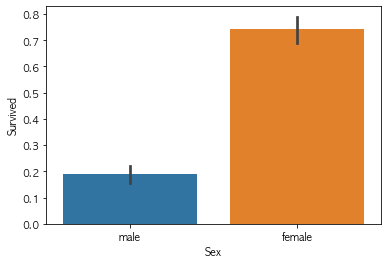

In [445]:
# 성별 생존자 막대그래프
sns.barplot(x='Sex', y='Survived', data=tit_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

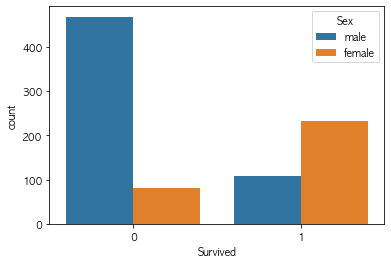

In [446]:
sns.countplot(x='Survived',hue='Sex', data=tit_df)

<BarContainer object of 2 artists>

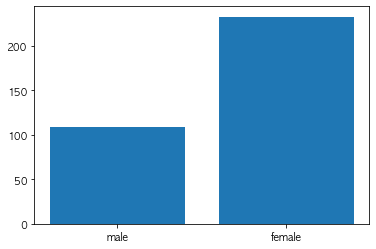

In [447]:
x=['male','female']
y = [tit_df.groupby(['Sex','Survived'])['Survived'].count()[3],tit_df.groupby(['Sex','Survived'])['Survived'].count()[1]]
plt.bar(x,y)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

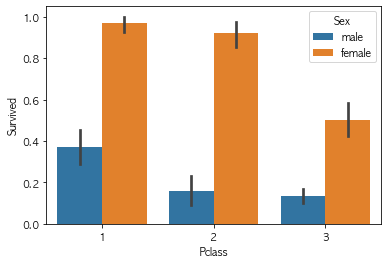

In [448]:
# 객실 등급별, 성별 생존 확률

# sns.countplot(x='Survived',hue='Sex', data=df)

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=tit_df)

**참고: 오차막대(error bar)**

: 일반적으로 3가지 값을 많이 사용한다.

1. 표준편차(standard deviation, SD)
2. 표준오차 (standard error, SE)
3. 95% 신뢰구간 (95% confidence interval, CI)

## 데이터 전처리 : 구간화(binning)

### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)

* Age 값 종류가 많기 때문에 범위별 분류해 카테고리 값 할당
* 입력 Age에 따라 구분값 반환 함수 설정
* DataFrame의 apply (lambda) 사용

In [449]:
# 입력 age 의 구분값을 반환하는 함수 작성

def get_category_age(age):
    result = ''
    if age <= 0 :
        result = 'Unknown'
    elif age <= 5 :
        result = 'Baby'
    elif age <= 12 :
        result = 'Child'
    elif age <= 18 :
        result = 'Teenager'
    elif age <= 25 :
        result = 'Student'
    elif age <= 35 :
        result = 'Young Adult'
    elif age <= 60 :
        result = 'Adult'
    else :
        result = 'Elderly'
    return result

In [450]:
tit_df['Age_cat'] = tit_df['Age'].apply(lambda x: get_category_age(x))
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Young Adult


In [451]:
tit_df['Age_cat'].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: Age_cat, dtype: int64

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

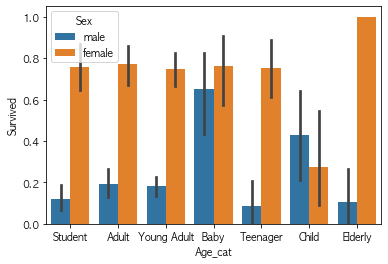

In [452]:
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=tit_df)

In [453]:
get_category_age(-1)

'Unknown'

## 데이터 전처리 : 인코딩

In [454]:
tit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환

In [455]:
tit_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [456]:
from sklearn.preprocessing import LabelEncoder

features = ['Sex', 'Cabin', 'Embarked']
for featuer in features:
    le = LabelEncoder()
    le = le.fit(tit_df[featuer])
    tit_df[featuer] = le.transform(tit_df[featuer])

In [457]:
tit_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,Young Adult


## 데이터 전처리 : 삭제

In [458]:
tit_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [459]:
tit_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
0,0,3,1,22.000000,1,0,7.2500,7,3,Student
1,1,1,0,38.000000,1,0,71.2833,2,0,Adult
2,1,3,0,26.000000,0,0,7.9250,7,3,Young Adult
3,1,1,0,35.000000,1,0,53.1000,2,3,Young Adult
4,0,3,1,35.000000,0,0,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3,Young Adult
887,1,1,0,19.000000,0,0,30.0000,1,3,Student
888,0,3,0,29.699118,1,2,23.4500,7,3,Young Adult
889,1,1,1,26.000000,0,0,30.0000,2,0,Young Adult


---

###### 지금 까지 가공한내용을  정리하고 함수로 작성 (재사용 가능) #######

In [470]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    # Age, Cabin, Embarked
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    # PassengerId, Name, Ticket
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 
def format_features(df):
    # Cabin 첫문자 추출
    df['Cabin'] = df['Cabin'].str[:1]

    # ['Sex', 'Cabin', 'Embarked']
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_dataFrame(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [471]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---

## 생존자 예측 프로세스

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [472]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titan_df = pd.read_csv('train.csv')

# Target dataset
y = titan_df['Survived']

# Input dataset : 'Survived' 칼럼 제외
X = titan_df.drop('Survived', axis=1)

In [473]:
y, X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64,
 None)

### 2단계. 데이터 전처리
- 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

In [474]:
# 데이터 전처리 함수 호출
X = transform_dataFrame(X)

In [481]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [475]:
# 생존자 예측을 수행할 피처 데이터 세트 완성
y, X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64,
 None)

### 3단계. Data Split : 학습 데이터/테스트 데이터

In [476]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

* 3개의 ML 알고리즘 수행  
     - 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
* 이 3개의 알고리즘으로 예측 수행하고 
* 교차 검증으로 평가

사이킷런 클래스
* 결정 트리 : DecisionTreeClassifier
* 랜덤 포레스트 : RandomForestClassifier
* 로지스틱 회귀 : LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
* 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
* 예측 성능 평가 :  정확도 (accuracy_score() 사용)

In [479]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test, pred)

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
accuracy_score(y_test, pred)


DecisionTreeClassifier(random_state=11)

0.7821229050279329

RandomForestClassifier(random_state=11)

0.7988826815642458

LogisticRegression(random_state=11)

0.8212290502793296

### 5단계. 교차 검증을 통한 모델 성능 향상
: 결정 트리 모델 좀 더 평가
* 사이킷런 model_selection 패키지의 
    - KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

In [491]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증 수행 
# 폴드 개수 : 5

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):

    kfold = KFold(n_splits=folds)
    scores = []

    n = 0

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        
        acc = accuracy_score(y_test, pred)
        n += 1
        scores.append(acc)
    
    return scores

In [507]:
# exec_kfold 호출
np.mean(exec_kfold(lr_clf))
np.mean(exec_kfold(rf_clf))
np.mean(exec_kfold(dt_clf))

0.7889837423890528

0.8148389931579938

0.782298662984119

In [ ]:
######### 참고: 피처 데이터 세트 확인 
# X_titanic_df와 X_titanic_df.values[train_index]


In [ ]:
######### 참고: index 값 출력


In [ ]:
######### 참고 : kford에서 train_index, test_index 확인 #####



- KFold 교차 검증 수행에서 enumerate() 사용하지 않을 경우

In [ ]:
################### 참고 ##################################
# 앞의  Model Selection 모듈 소개에서 한 것처럼 enumerate() 사용하지 않을 경우
# n_iter 변수를 추가하여 반복횟수 값 저장하여 이용

    
# exec_kfold 호출



- cross_val_score()를 이용해 교차 검증 수행

In [509]:
# cross_val_score()를 이용해 교차 검증 수행
from sklearn.model_selection import cross_val_score

# cross_val_score(estimator, data, label, 폴드 수)
scores = cross_val_score(dt_clf, X, y, cv=5)

np.mean(scores)


0.7879291946519366

### 6단계. 하이퍼파라미터 튜닝

- GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

In [519]:
# GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝
from sklearn.model_selection import GridSearchCV

# DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정
# CV : 5개의 폴드 세트 지정
# 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf 

params = {'max_depth': [2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,7]}

grid_dt_clf = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
grid_dt_clf.fit(X, y)
grid_dt_clf.best_params_
grid_dt_clf.best_score_
best_clf = grid_dt_clf.best_estimator_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 7],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}

0.8227229929069111

In [520]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
pred = best_clf.predict(X_test)
accuracy_score(y_test, pred)

0.8659217877094972